In [61]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [92]:
df_num = pd.read_csv('Data/zippedData/tn.movie_budgets.csv.gz')
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [93]:
df_num.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [94]:
def data_cleaning_money(column_name):
    df_num[column_name] = df_num[column_name].str.replace('$', '').str.replace(',', '').astype(float)

In [95]:
data_cleaning_money('production_budget')

In [96]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,"$620,181,382","$1,316,721,747"


In [97]:
data_cleaning_money('domestic_gross')

In [98]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,"$1,316,721,747"


In [99]:
data_cleaning_money('worldwide_gross')

In [100]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [101]:
df_num['release_date'] = pd.to_datetime(df_num['release_date'])

In [102]:
df_num.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [103]:
df_num_cleaned = df_num.drop(columns = 'id')

In [104]:
df_num_cleaned.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [105]:
df_num_good = df_num_cleaned[df_num_cleaned['domestic_gross'] != 0.0]
df_num_good = df_num_good[df_num_good['worldwide_gross'] != 0.0]
df_num_good = df_num_good[df_num_good['production_budget'] != 0.0]

In [106]:
df_num_good

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
5775,2006-05-26,Cavite,7000.0,70071.0,7.164400e+04
5776,2004-12-31,The Mongol King,7000.0,900.0,9.000000e+02
5778,1999-04-02,Following,6000.0,48482.0,2.404950e+05
5779,2005-07-13,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [107]:
df_num_good.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5234 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5234 non-null   datetime64[ns]
 1   movie              5234 non-null   object        
 2   production_budget  5234 non-null   float64       
 3   domestic_gross     5234 non-null   float64       
 4   worldwide_gross    5234 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 245.3+ KB


In [108]:
df_num_good['ROI'] = (df_num_good['worldwide_gross'] - df_num_good['production_budget']) / df_num_good['production_budget']

In [109]:
df_num_good.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,5.532577
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.546673
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.572108
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696


In [110]:
df_num_final = df_num_good.sort_values(by = 'ROI', ascending = False)

In [111]:
df_num_final.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
5745,1972-06-30,Deep Throat,25000.0,45000000.0,45000000.0,1799.000000
5613,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,497.750000
5492,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,430.517853
5679,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740
5406,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.833333


In [112]:
df_num_final.reset_index(inplace = True)

In [113]:
df_num_final

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
0,5745,1972-06-30,Deep Throat,25000.0,45000000.0,45000000.0,1799.000000
1,5613,1980-03-21,Mad Max,200000.0,8750000.0,99750000.0,497.750000
2,5492,2009-09-25,Paranormal Activity,450000.0,107918810.0,194183034.0,430.517853
3,5679,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740
4,5406,1999-07-14,The Blair Witch Project,600000.0,140539099.0,248300000.0,412.833333
...,...,...,...,...,...,...,...
5229,1242,2013-11-01,Mr. Nobody,46500000.0,3622.0,22254.0,-0.999521
5230,5027,1993-01-01,Ed and his Dead Mother,1800000.0,673.0,673.0,-0.999626
5231,2152,1997-08-24,The Grimm Brothers' Snow White,26000000.0,5000.0,5000.0,-0.999808
5232,3818,2015-05-08,Skin Trade,9000000.0,1242.0,1242.0,-0.999862


In [114]:
df_num_final.drop(df_num_final[df_num_final['release_date'] < pd.Timestamp(2010, 1, 1)].index, inplace = True)

In [115]:
df_num_final

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
3,5679,2015-07-10,The Gallows,100000.0,22764410.0,41656474.0,415.564740
26,5211,2012-01-06,The Devil Inside,1000000.0,53262945.0,101759490.0,100.759490
44,5062,2011-04-01,Insidious,1500000.0,54009150.0,99870886.0,65.580591
46,5213,2015-04-17,Unfriended,1000000.0,32789645.0,64364198.0,63.364198
52,4664,2010-10-20,Paranormal Activity 2,3000000.0,84752907.0,177512032.0,58.170677
...,...,...,...,...,...,...,...
5223,5466,2018-05-11,Higher Power,500000.0,528.0,528.0,-0.998944
5224,5296,2015-05-15,Childless,1000000.0,1036.0,1036.0,-0.998964
5229,1242,2013-11-01,Mr. Nobody,46500000.0,3622.0,22254.0,-0.999521
5232,3818,2015-05-08,Skin Trade,9000000.0,1242.0,1242.0,-0.999862


<AxesSubplot:xlabel='production_budget', ylabel='ROI'>

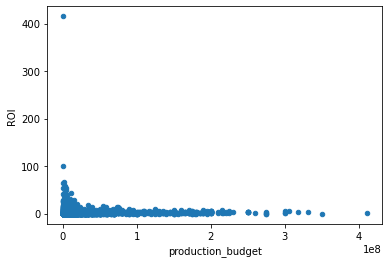

In [116]:
df_num_final.plot.scatter(x = 'production_budget', y = 'ROI')

In [117]:
df_num_final['profit'] = (df_num_final['worldwide_gross'] - df_num_final['production_budget'])

<AxesSubplot:xlabel='production_budget', ylabel='profit'>

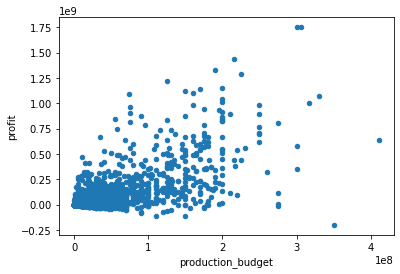

In [118]:
df_num_final.plot.scatter(x = 'production_budget', y = 'profit')

In [123]:
df_num_final.sort_values(by = 'profit', ascending = False)

,index,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI,profit
685,6,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,5.827114,1.748134e+09
703,5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,5.710167,1.747311e+09
600,33,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09,6.669092,1.433855e+09
557,66,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09,6.993278,1.328723e+09
699,26,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09,5.746382,1.292936e+09
...,...,...,...,...,...,...,...,...
4372,300,2010-12-17,How Do You Know?,120000000.0,30212620.0,4.962818e+07,-0.586432,-7.037182e+07
4813,477,2017-04-21,The Promise,90000000.0,8224288.0,1.055142e+07,-0.882762,-7.944858e+07
5040,341,2019-06-14,Men in Black: International,110000000.0,3100000.0,3.100000e+06,-0.971818,-1.069000e+08
4579,193,2011-03-11,Mars Needs Moms,150000000.0,21392758.0,3.954976e+07,-0.736335,-1.104502e+08
